All data was obtained from the Wall Street Journal based on data from Payscale, Inc:

Salaries for Colleges by Type

Salaries for Colleges by Region

Degrees that Pay you Back

**Salary Increase By Type of College**

Party school? Liberal Arts college? State School? You already know your starting salary will be different depending on what type of school you attend.

But, increased earning power shows less disparity. Ten years out, graduates of Ivy League schools earned 99% more than they did at graduation. Party school graduates saw an 85% increase. Engineering school graduates fared worst, earning 76% more 10 years out of school. See where your school ranks.


**Salaries By Region**

Attending college in the Midwest leads to the lowest salary both at graduation and at mid-career, according to the PayScale Inc. survey. Graduates of schools in the Northeast and California fared best.


**Salary Increase By Major**

Your parents might have worried when you chose Philosophy or International Relations as a major. But a year-long survey of 1.2 million people with only a bachelor's degree by PayScale Inc. shows that graduates in these subjects earned 103.5% and 97.8% more, respectively, about 10 years post-commencement. Majors that didn't show as much salary growth include Nursing and Information Technology.

In [1013]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1014]:
## Import datasets

## df_undergrad --> by major
## df_type --> by college type
## df_region --> by college region

## All of them have 8 colums, including starting salary, mid-carrer salary and percentile salaries

df_undergrad = pd.read_csv("degrees-that-pay-back.csv")
df_type = pd.read_csv("salaries-by-college-type.csv")
df_region = pd.read_csv("salaries-by-region.csv")

In [1015]:
## Looking at the first dataset about majors
df_undergrad.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [1016]:
## Renaming the columns to smaller texts
df_undergrad.columns = ["major", "start_sal", "mid_sal", "p_change", "mid_10p", "mid_25p", "mid_75p", "mid_90p"]
df_undergrad.head()

,major,start_sal,mid_sal,p_change,mid_10p,mid_25p,mid_75p,mid_90p
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [1017]:
## Checking the type of the columns
## Only the percent change column have the type float
## All other columns have the type object
df_undergrad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   major      50 non-null     object 
 1   start_sal  50 non-null     object 
 2   mid_sal    50 non-null     object 
 3   p_change   50 non-null     float64
 4   mid_10p    50 non-null     object 
 5   mid_25p    50 non-null     object 
 6   mid_75p    50 non-null     object 
 7   mid_90p    50 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.3+ KB


In [1018]:
## Checking what the object type means
## Using the first row of the starting salary column to check
## Type is string
## All columns with the dollar sign ($) are strings
type(df_undergrad["start_sal"][0])

str

In [1019]:
## Converting all columns with the dollar sign from strings to numbers
## Using str.replace() and pd.to_numeric()

dollar_columns = ["start_sal", "mid_sal", "mid_10p", "mid_25p", "mid_75p", "mid_90p"]
for col in dollar_columns:
    df_undergrad[col] = df_undergrad[col].str.replace("$", "")
    df_undergrad[col] = df_undergrad[col].str.replace(",", "")
    df_undergrad[col] = pd.to_numeric(df_undergrad[col])
    df_undergrad[col] = df_undergrad[col] / 1000

df_undergrad.head()

,major,start_sal,mid_sal,p_change,mid_10p,mid_25p,mid_75p,mid_90p
0,Accounting,46.0,77.1,67.6,42.2,56.1,108.0,152.0
1,Aerospace Engineering,57.7,101.0,75.0,64.3,82.1,127.0,161.0
2,Agriculture,42.6,71.9,68.8,36.3,52.1,96.3,150.0
3,Anthropology,36.8,61.5,67.1,33.8,45.5,89.3,138.0
4,Architecture,41.6,76.8,84.6,50.6,62.2,97.0,136.0


In [1020]:
## Checking type of columns again
## All number columns are now float
df_undergrad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   major      50 non-null     object 
 1   start_sal  50 non-null     float64
 2   mid_sal    50 non-null     float64
 3   p_change   50 non-null     float64
 4   mid_10p    50 non-null     float64
 5   mid_25p    50 non-null     float64
 6   mid_75p    50 non-null     float64
 7   mid_90p    50 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [1021]:
## Analysing data from college majors dataset
## There are 50 undergraduate majors
## Medical school and law school are graduate majors in the US, so they aren't in the data

## Average starting salary for an undergraduate degree holder is around $41000 a year, with most people getting paid between $37000 and $50000 a year
## Average mid-career salary is $72000, with most people receiving between $60000 and $89000
## Salary varies a lot depending on the major (big standard deviation)
df_undergrad.describe()

,start_sal,mid_sal,p_change,mid_10p,mid_25p,mid_75p,mid_90p
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000
mean,44.310000,74.786000,69.274000,43.40800,55.988000,102.13800,142.766000
std,9.360866,16.088404,17.909908,12.00078,13.936952,20.63679,27.851249
min,34.000000,52.000000,23.400000,26.70000,36.500000,70.50000,96.400000
25%,37.050000,60.825000,59.125000,34.82500,44.975000,83.27500,124.250000
50%,40.850000,72.000000,67.800000,39.40000,52.450000,99.40000,145.500000
75%,49.875000,88.750000,82.425000,49.85000,63.700000,118.75000,161.750000
max,74.300000,107.000000,103.500000,71.90000,87.300000,145.00000,210.000000


In [1022]:
## Sorting majors by starting salary
df_undergrad.sort_values(by = "start_sal", ascending = True, inplace = True)

## Physician Assistant have the highest starting salary
## Requires bachelor's degree in science (registered nurse, paramedics), 2-year master's degree program and license from the state

## Chemical engineering have the highest starting salary with undergraduate degree only
## Followed by various degrees of engineering, computer science and nursing
df_undergrad.head(10)

,major,start_sal,mid_sal,p_change,mid_10p,mid_25p,mid_75p,mid_90p
49,Spanish,34.0,53.1,56.2,31.0,40.0,76.8,96.4
47,Religion,34.1,52.0,52.5,29.7,36.5,70.9,96.4
18,Education,34.9,52.0,49.0,29.3,37.9,73.4,102.0
15,Criminal Justice,35.0,56.3,60.9,32.2,41.6,80.7,107.0
34,Journalism,35.6,66.7,87.4,38.4,48.3,97.7,145.0
26,Graphic Design,35.7,59.8,67.5,36.0,45.5,80.8,112.0
5,Art History,35.8,64.9,81.3,28.8,42.2,87.4,125.0
16,Drama,35.9,56.9,58.5,36.7,41.3,79.1,153.0
46,Psychology,35.9,60.4,68.2,31.6,42.1,87.5,127.0
39,Music,35.9,55.0,53.2,26.7,40.2,88.0,134.0


In [1023]:
## Reseting index by descending starting salary to create a graph
df_undergrad = df_undergrad.reset_index()
df_undergrad.head(10)

,index,major,start_sal,mid_sal,p_change,mid_10p,mid_25p,mid_75p,mid_90p
0,49,Spanish,34.0,53.1,56.2,31.0,40.0,76.8,96.4
1,47,Religion,34.1,52.0,52.5,29.7,36.5,70.9,96.4
2,18,Education,34.9,52.0,49.0,29.3,37.9,73.4,102.0
3,15,Criminal Justice,35.0,56.3,60.9,32.2,41.6,80.7,107.0
4,34,Journalism,35.6,66.7,87.4,38.4,48.3,97.7,145.0
5,26,Graphic Design,35.7,59.8,67.5,36.0,45.5,80.8,112.0
6,5,Art History,35.8,64.9,81.3,28.8,42.2,87.4,125.0
7,16,Drama,35.9,56.9,58.5,36.7,41.3,79.1,153.0
8,46,Psychology,35.9,60.4,68.2,31.6,42.1,87.5,127.0
9,39,Music,35.9,55.0,53.2,26.7,40.2,88.0,134.0


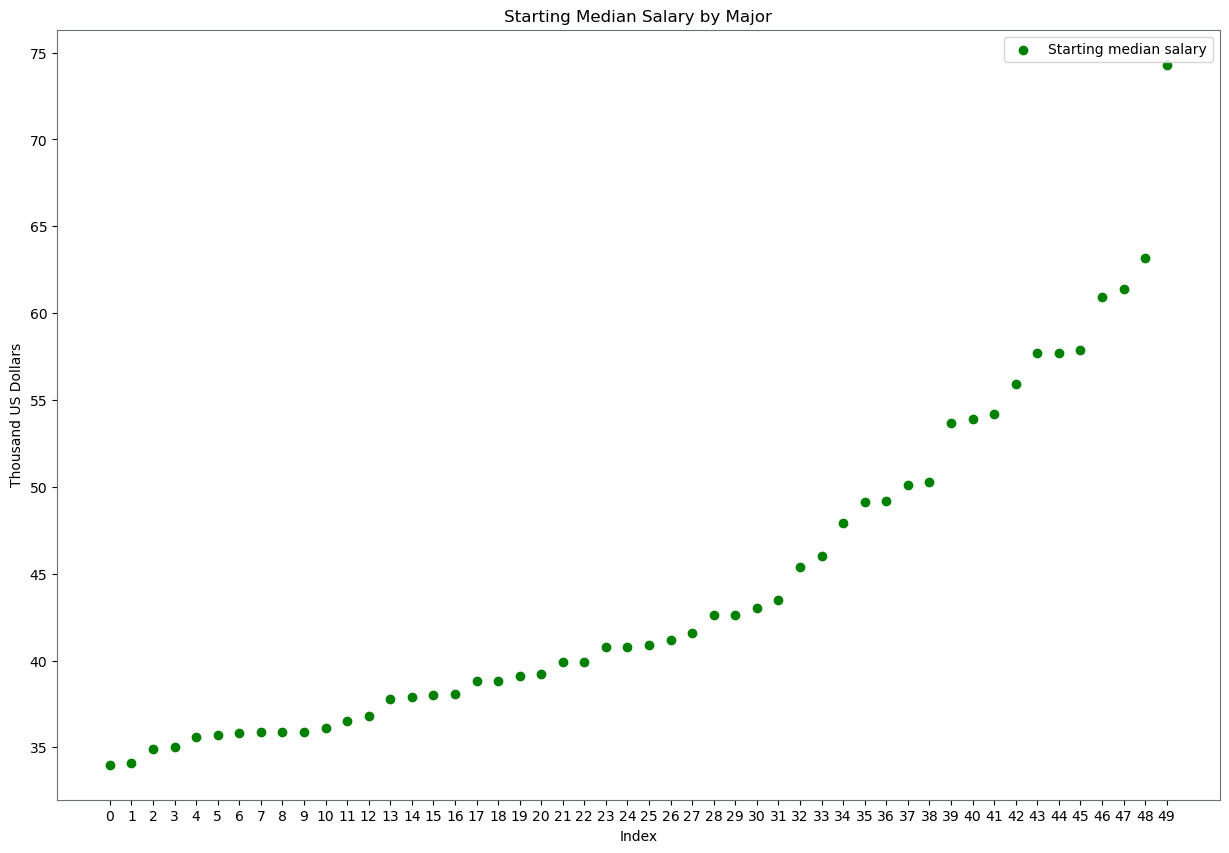

In [1024]:
## Creating first graph
fig = plt.figure(figsize=(15,10))
x = df_undergrad.index
y = df_undergrad.start_sal
labels = df_undergrad.index

plt.scatter(x, y, color = "green", label = "Starting median salary")

## Shows all labels on the x-axis (to be changed to major names)
## Otherwise it would show spaced numbers (0, 10, 20, and so on)
plt.xticks(x, labels)

plt.xlabel("Index")
plt.ylabel("Thousand US Dollars")
plt.title("Starting Median Salary by Major")
plt.legend()
plt.show()

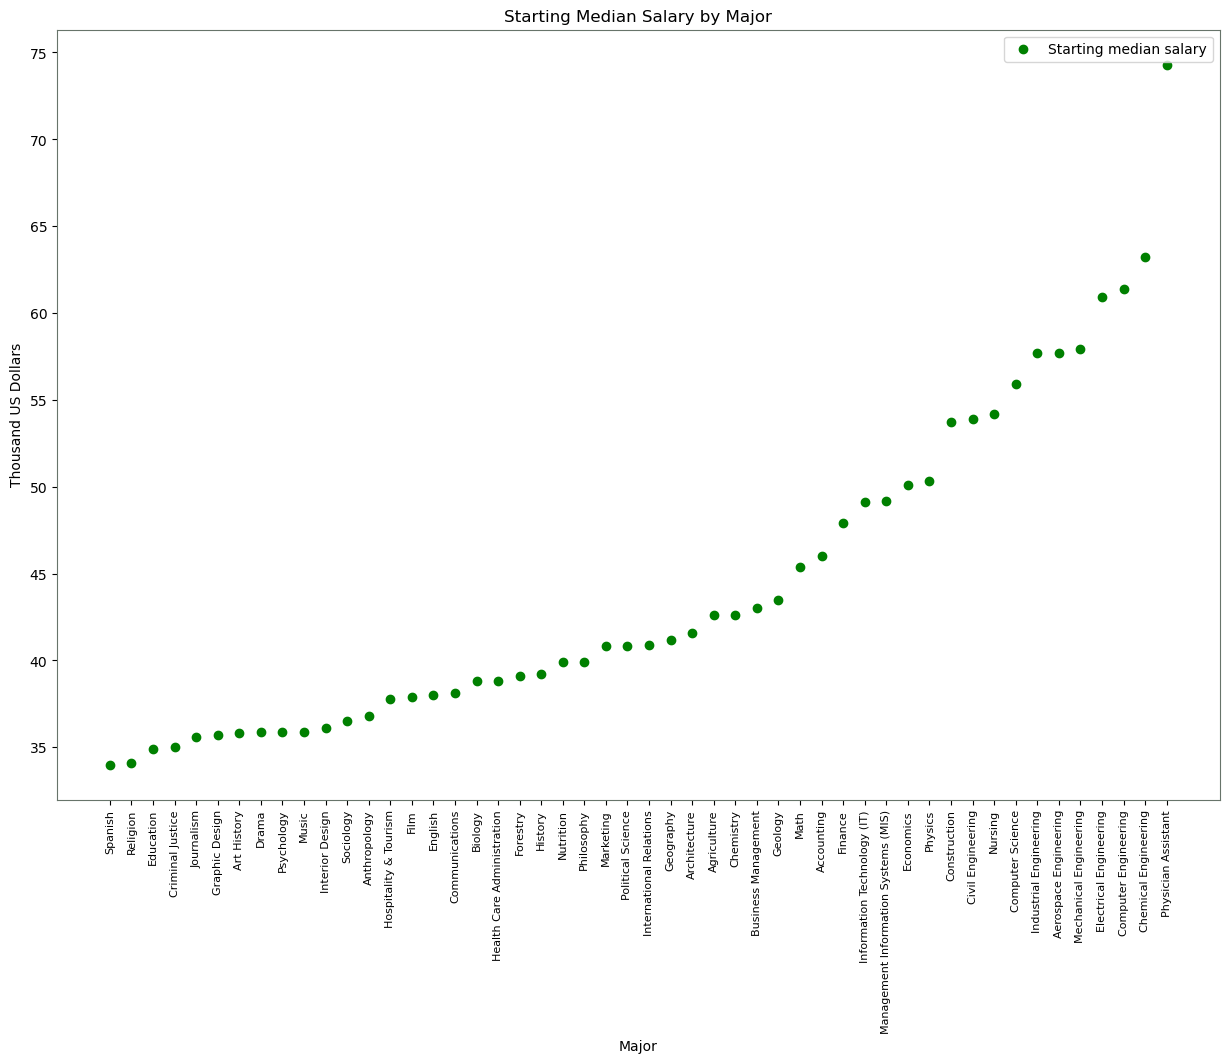

In [1025]:
## Adding major names along the x-axis
fig = plt.figure(figsize=(15,10))
x = df_undergrad.index
y = df_undergrad.start_sal

## Changing label from index to major column
labels = df_undergrad.major

plt.scatter(x, y, color = "green", label = "Starting median salary")

## Experiment rotating major names to vertical position (too much overlap on the horizontal one)
plt.xticks(x, labels, fontsize=8, rotation = "vertical")

plt.xlabel("Major")
plt.ylabel("Thousand US Dollars")
plt.title("Starting Median Salary by Major")
plt.legend()
plt.show()


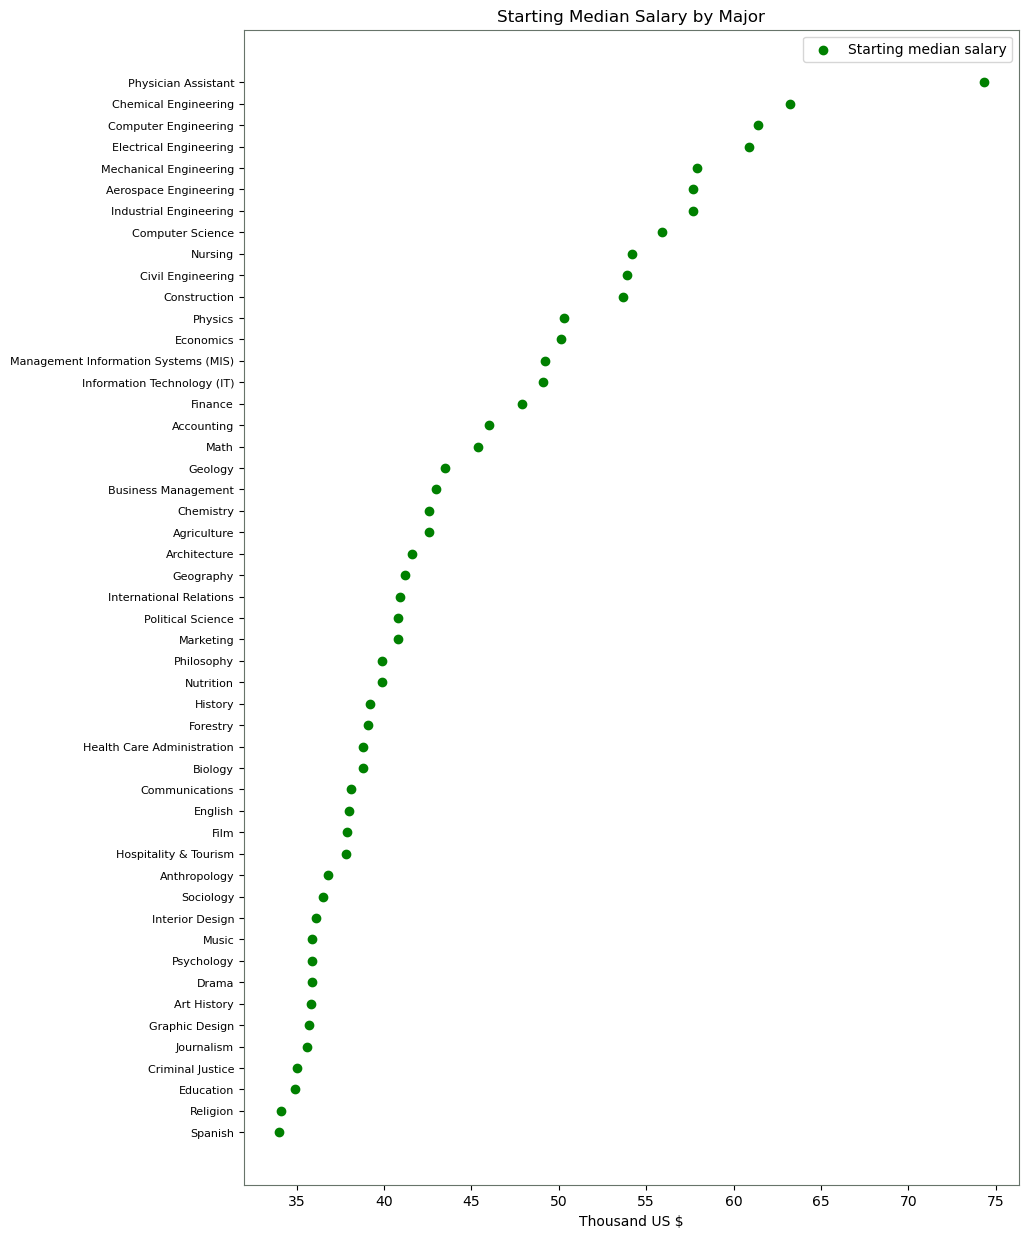

In [1026]:
## Flipping the y-axis and the x-axis for better visualization
fig = plt.figure(figsize=(10,15))
x = df_undergrad.start_sal
y = df_undergrad.index
labels = df_undergrad.major

plt.scatter(x, y, color = "green", label = "Starting median salary")

## Showing all majors in the y-axis
plt.yticks(y, labels, fontsize = 8)

## Changing x-axis label to US Dollars
## Excluding y-axis label
plt.xlabel("Thousand US $")
plt.ylabel("")

plt.title("Starting Median Salary by Major")
plt.legend()
plt.show()

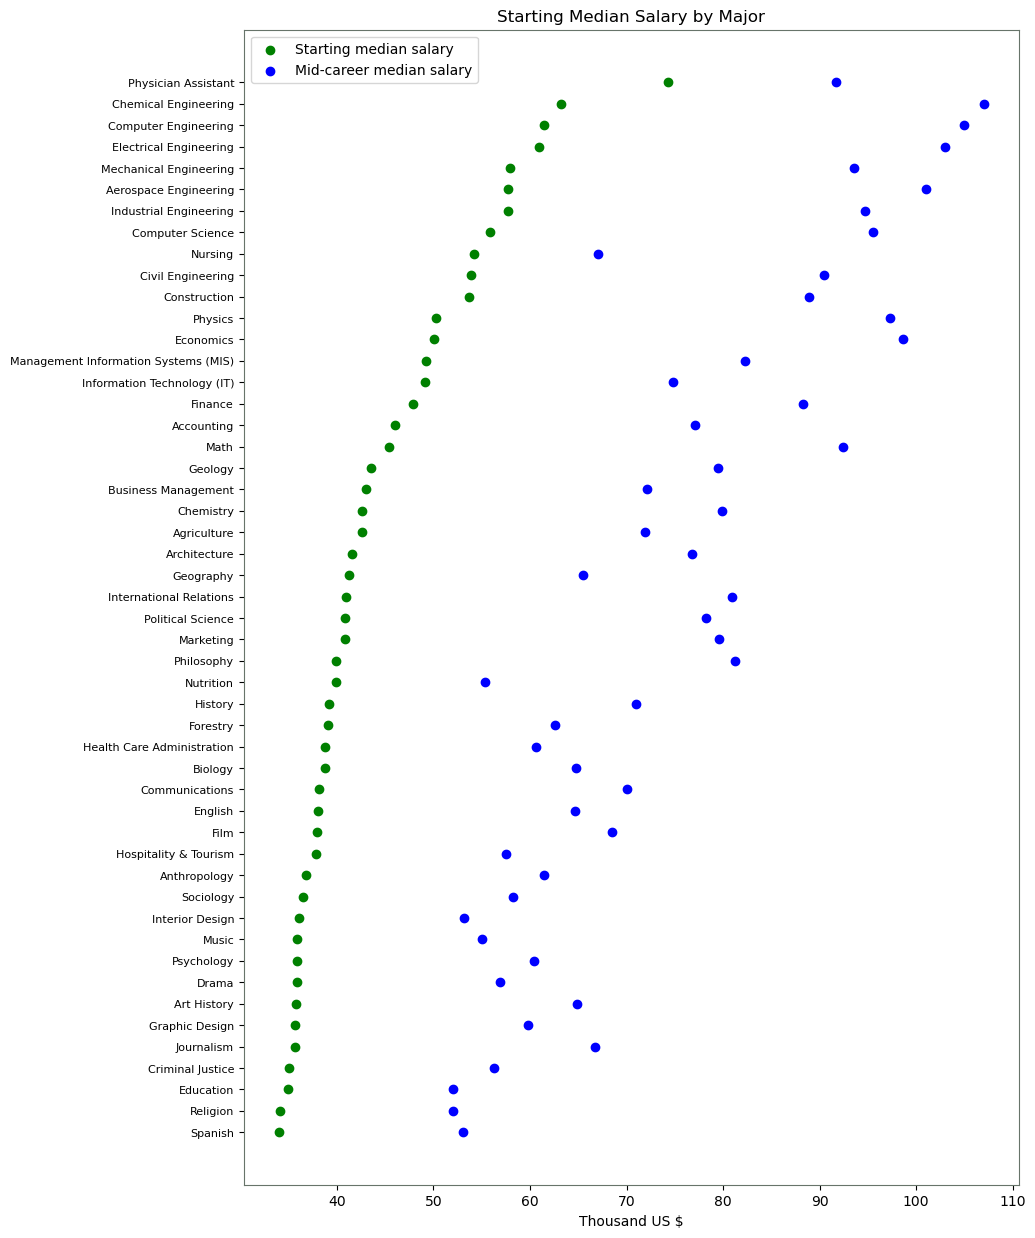

In [1027]:
## Adding mid-career salary to the graph
fig = plt.figure(figsize=(10,15))

x = df_undergrad.start_sal
y = df_undergrad.index
labels = df_undergrad.major

plt.scatter(x, y, color = "green", label = "Starting median salary")
plt.yticks(y, labels, fontsize=8)

x2 = df_undergrad.mid_sal
plt.scatter(x2, y, color = "blue", label = "Mid-career median salary")

plt.xlabel("Thousand US $")
plt.ylabel("")

plt.title("Starting Median Salary by Major")
plt.legend(loc=2)
plt.show()

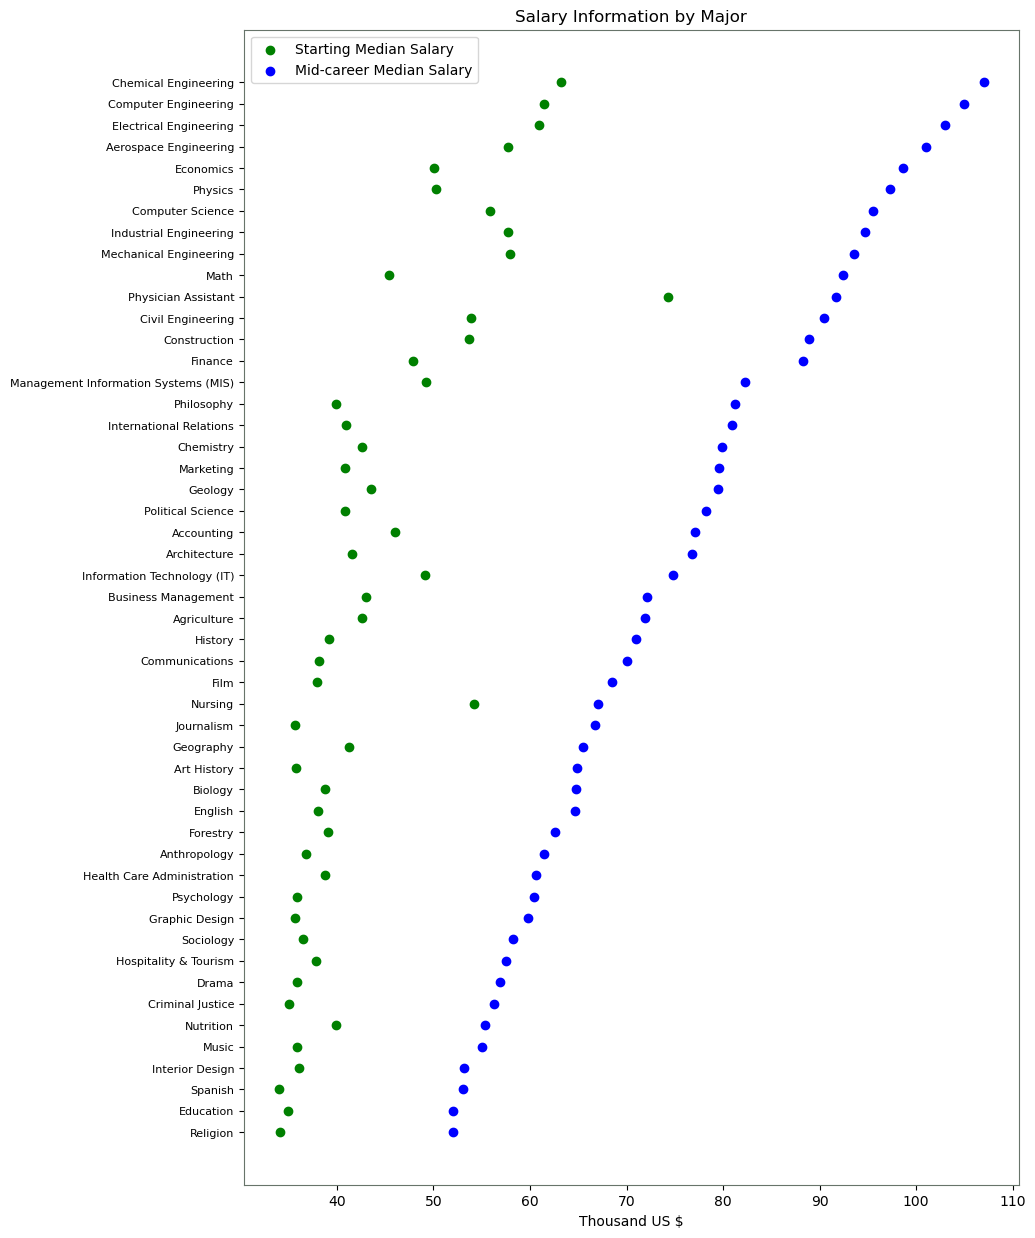

In [1028]:
## Sorting by mid-career median salary

## Engineering majors dominate the top
## Physician Assistante and Nursing have fallen in the ranking
## Economics, Physics and Math have risen by a good margin

df_undergrad2 = df_undergrad.sort_values(by = "mid_sal", ascending = True)
df_undergrad2 = df_undergrad2.reset_index()

fig = plt.figure(figsize=(10,15))

x = df_undergrad2.start_sal
y = df_undergrad2.index
labels = df_undergrad2.major

plt.scatter(x, y, color="green", label = "Starting Median Salary")
plt.yticks(y, labels, fontsize = 8)

x2 = df_undergrad2.mid_sal
plt.scatter(x2, y, color = "blue", label = "Mid-career Median Salary")

plt.xlabel("Thousand US $")
plt.ylabel("")
plt.title("Salary Information by Major")
plt.legend(loc = 2)
plt.show()

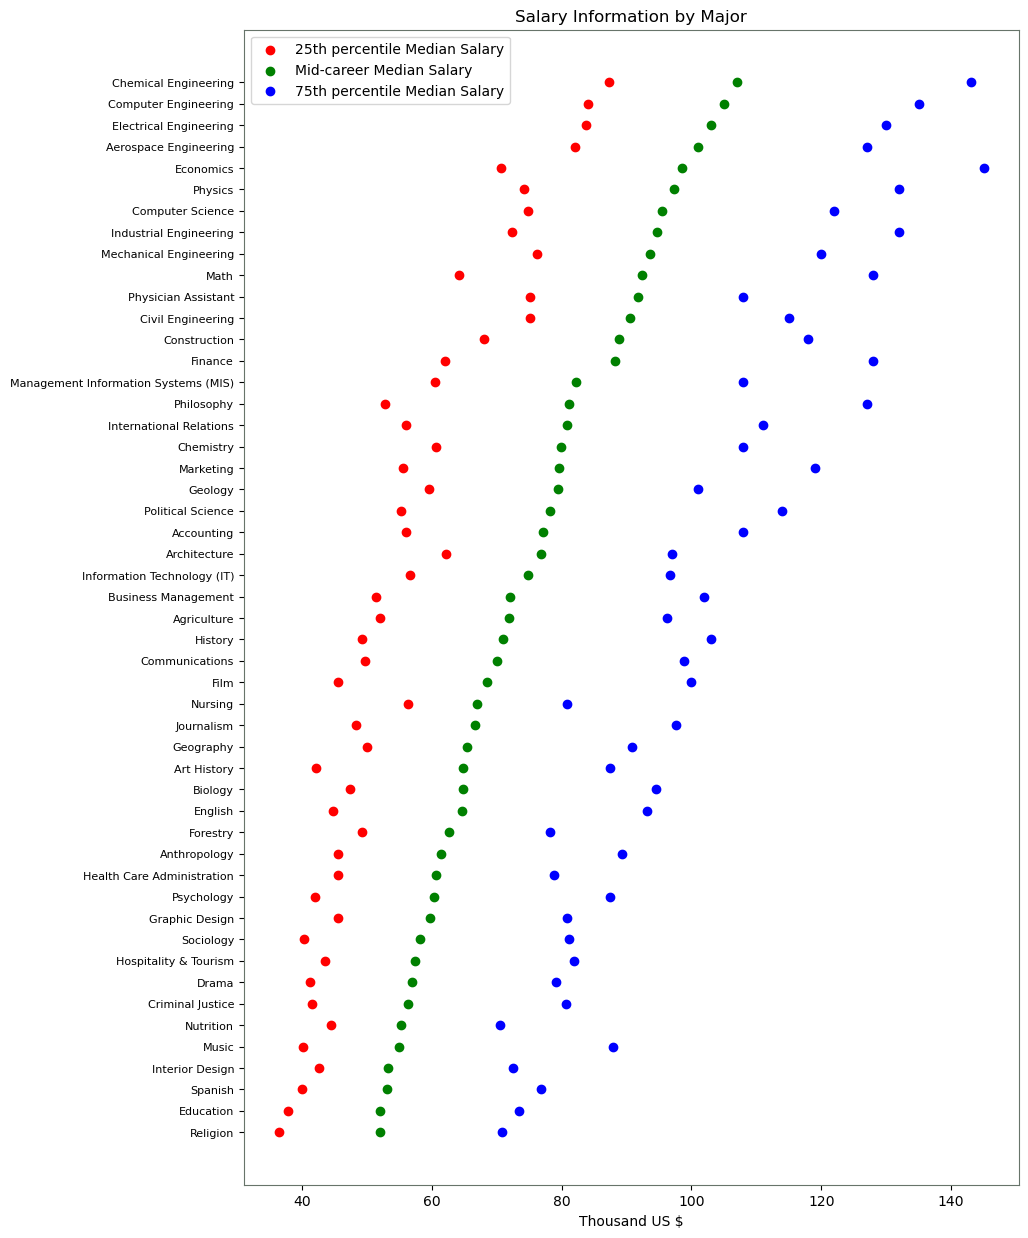

In [1029]:
## Deleting starting salary
## Adding 25th and 75th percentile to the graph

## Economics rank 1st in the 75th percentile

df_undergrad2 = df_undergrad.sort_values(by = "mid_sal", ascending = True)
df_undergrad2 = df_undergrad2.reset_index()

fig = plt.figure(figsize=(10,15))

x = df_undergrad2.mid_25p
y = df_undergrad2.index
labels = df_undergrad2.major

plt.scatter(x, y, color="red", label = "25th percentile Median Salary")
plt.yticks(y, labels, fontsize=8)

x2 = df_undergrad2.mid_sal
plt.scatter(x2, y, color = "green", label = "Mid-career Median Salary")

x3 = df_undergrad2.mid_75p
plt.scatter(x3, y, color = "blue", label = "75th percentile Median Salary")

plt.xlabel("Thousand US $")
plt.ylabel("")
plt.title("Salary Information by Major")
plt.legend(loc = 2)
plt.show()

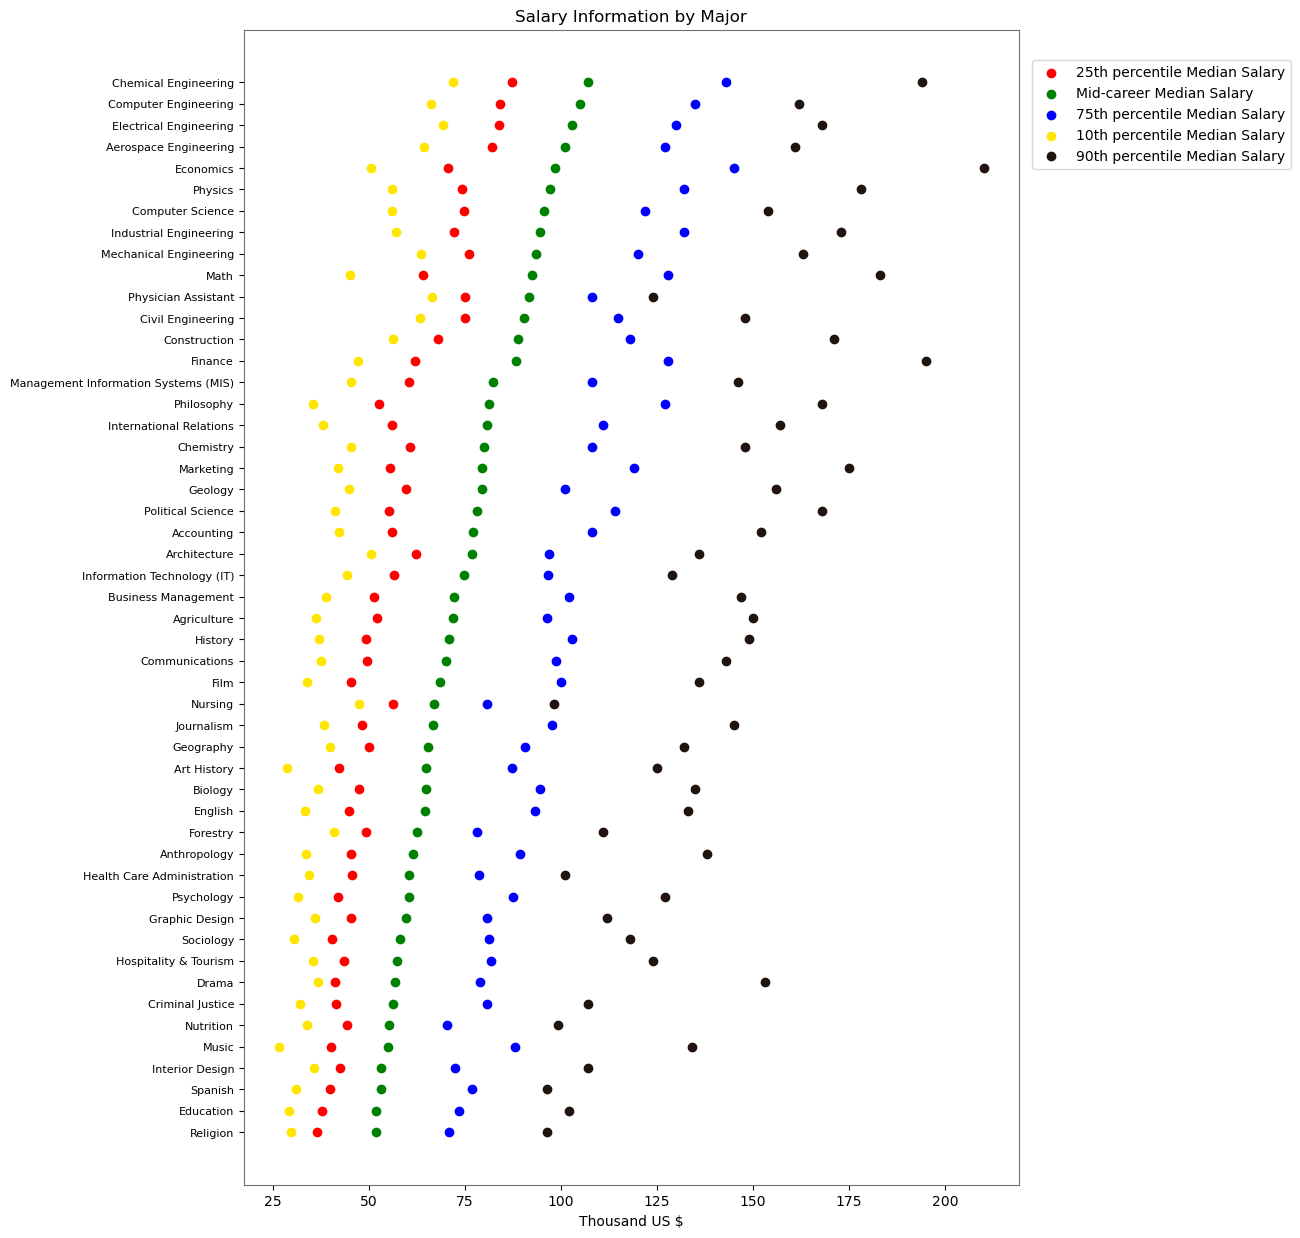

In [1030]:
## Adding the 10th and 90th percentile to the graph

## Economics ranks 1st, followed by finance in the 90th percentile

# Outliers are more visible in the 10th and 90th percentile

df_undergrad2 = df_undergrad.sort_values(by = "mid_sal", ascending = True)
df_undergrad2 = df_undergrad2.reset_index()

fig = plt.figure(figsize=(10,15))

x = df_undergrad2.mid_25p
y = df_undergrad2.index
labels = df_undergrad2.major

plt.scatter(x, y, color="red", label = "25th percentile Median Salary")
plt.yticks(y, labels, fontsize=8)

x2 = df_undergrad2.mid_sal
plt.scatter(x2, y, color = "green", label = "Mid-career Median Salary")

x3 = df_undergrad2.mid_75p
plt.scatter(x3, y, color = "blue", label = "75th percentile Median Salary")

x4 = df_undergrad2.mid_10p
plt.scatter(x4, y, color = "#ffe600", label = "10th percentile Median Salary")

x5 = df_undergrad2.mid_90p
plt.scatter(x5, y, color = "#21130d", label = "90th percentile Median Salary")

plt.xlabel("Thousand US $")
plt.ylabel("")
plt.title("Salary Information by Major")

## Moving legend out of the graph
plt.legend(loc = "upper right", bbox_to_anchor=(1.36,.98))
plt.show()

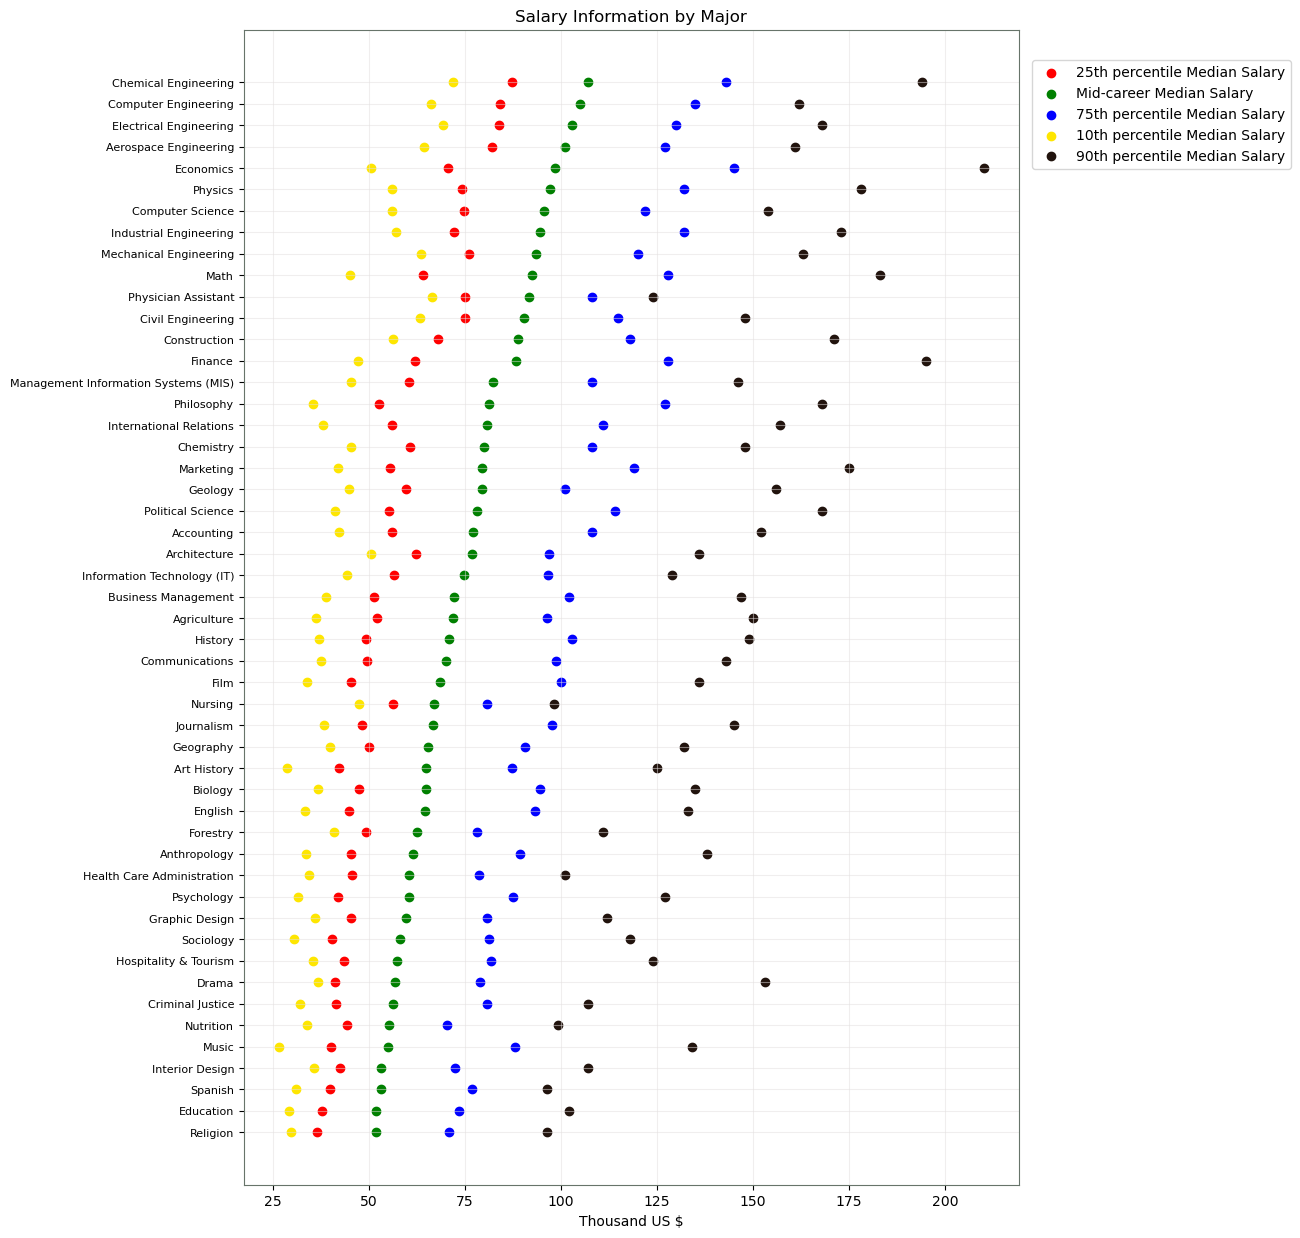

In [1031]:
## Adding grid to the graph

df_undergrad2 = df_undergrad.sort_values(by = "mid_sal", ascending = True)
df_undergrad2 = df_undergrad2.reset_index()

fig = plt.figure(figsize=(10,15))

## Coloring the grid lines
plt.rc('grid', alpha = .5, color = '#e3dfdf')
## Coloring the graph edges
plt.rc('axes', edgecolor = '#67746A')

x = df_undergrad2.mid_25p
y = df_undergrad2.index
labels = df_undergrad2.major

plt.scatter(x, y, color="red", label = "25th percentile Median Salary")
plt.yticks(y, labels, fontsize=8)

x2 = df_undergrad2.mid_sal
plt.scatter(x2, y, color = "green", label = "Mid-career Median Salary")

x3 = df_undergrad2.mid_75p
plt.scatter(x3, y, color = "blue", label = "75th percentile Median Salary")

x4 = df_undergrad2.mid_10p
plt.scatter(x4, y, color = "#fee600", label = "10th percentile Median Salary")

x5 = df_undergrad2.mid_90p
plt.scatter(x5, y, color = "#21130d", label = "90th percentile Median Salary")

plt.xlabel("Thousand US $")
plt.ylabel("")
plt.title("Salary Information by Major")

plt.legend(loc = "upper right", bbox_to_anchor=(1.36,.98))
plt.grid(True)
plt.show()

In [1032]:
## Looking at second dataframe (region)
## Adds school name and region
df_region.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [1033]:
## Changing columns names
df_region.columns = ["name", "region", "start_sal", "mid_sal", "mid_10p", "mid_25p", "mid_75p", "mid_90p"]

In [1034]:
## Converting strings to float values
dollar_columns = ["start_sal", "mid_sal", "mid_10p", "mid_25p", "mid_75p", "mid_90p"]
for col in dollar_columns:
    df_region[col] = df_region[col].str.replace("$", "")
    df_region[col] = df_region[col].str.replace(",", "")
    df_region[col] = pd.to_numeric(df_region[col])
    df_region[col] /= 1000
df_region.head()

,name,region,start_sal,mid_sal,mid_10p,mid_25p,mid_75p,mid_90p
0,Stanford University,California,70.4,129.0,68.4,93.1,184.0,257.0
1,California Institute of Technology (CIT),California,75.5,123.0,NaN,104.0,161.0,NaN
2,Harvey Mudd College,California,71.8,122.0,NaN,96.0,180.0,NaN
3,"University of California, Berkeley",California,59.9,112.0,59.5,81.0,149.0,201.0
4,Occidental College,California,51.9,105.0,NaN,54.8,157.0,NaN


In [1035]:
## Searching unique region values
## 5 different regions
df_region.region.unique()

array(['California', 'Western', 'Midwestern', 'Southern', 'Northeastern'],
      dtype=object)

In [1036]:
## Sorting by starting salary and reseting index
df_region2 = df_region.sort_values(by = "start_sal", ascending=False)
df_region2 = df_region2.reset_index()
del df_region2["index"]
df_region2.head()

,name,region,start_sal,mid_sal,mid_10p,mid_25p,mid_75p,mid_90p
0,California Institute of Technology (CIT),California,75.5,123.0,NaN,104.0,161.0,NaN
1,Massachusetts Institute of Technology (MIT),Northeastern,72.2,126.0,76.8,99.2,168.0,220.0
2,Harvey Mudd College,California,71.8,122.0,NaN,96.0,180.0,NaN
3,Stanford University,California,70.4,129.0,68.4,93.1,184.0,257.0
4,Princeton University,Northeastern,66.5,131.0,68.9,100.0,190.0,261.0


In [1037]:
## Checking mean on starting salary
mean_start_sal_region = df_region2.start_sal.mean()
mean_start_sal_region

46.253437500000004

In [1038]:
## Checking standard deviation on starting salary
std_start_sal_region = df_region2.start_sal.std()
std_start_sal_region

6.6170380011231025

In [1039]:
## Classifying schools by starting salary
def classify_start_sal(start_sal, mean, std):
    if start_sal > (mean + std):
        return 4
    elif start_sal > mean:
        return 3
    elif start_sal > (mean - std):
        return 2
    else:
        return 1

In [1040]:
## Transforming starting salary in categoric data
df_region2.start_sal.map(lambda sal: classify_start_sal(sal, mean_start_sal_region, std_start_sal_region))

0      4
1      4
2      4
3      4
4      4
      ..
315    1
316    1
317    1
318    1
319    1
Name: start_sal, Length: 320, dtype: int64

In [1041]:
## Adding to school region dataframe
df_region2["start_sal_map"] = df_region2.start_sal.map(lambda sal: classify_start_sal(sal, mean_start_sal_region, std_start_sal_region))
df_region2.head()

,name,region,start_sal,mid_sal,mid_10p,mid_25p,mid_75p,mid_90p,start_sal_map
0,California Institute of Technology (CIT),California,75.5,123.0,NaN,104.0,161.0,NaN,4
1,Massachusetts Institute of Technology (MIT),Northeastern,72.2,126.0,76.8,99.2,168.0,220.0,4
2,Harvey Mudd College,California,71.8,122.0,NaN,96.0,180.0,NaN,4
3,Stanford University,California,70.4,129.0,68.4,93.1,184.0,257.0,4
4,Princeton University,Northeastern,66.5,131.0,68.9,100.0,190.0,261.0,4


In [1042]:
## Checking number of schools in each category
df_region2.start_sal_map.value_counts()

start_sal_map
2    156
3     83
4     46
1     35
Name: count, dtype: int64

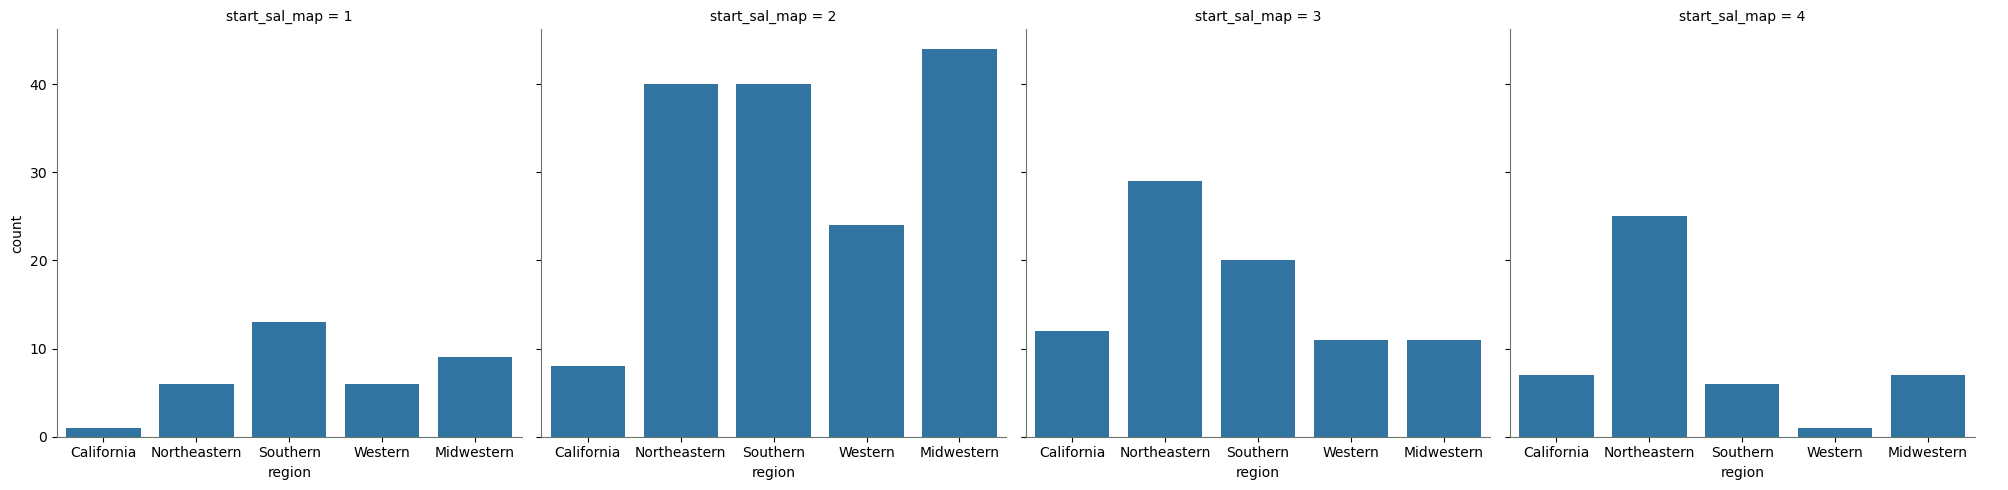

In [1043]:
## Plotting by Starting Salary Map
sns.catplot(x='region', col='start_sal_map', kind='count', data=df_region2)

# Most of the schools with high starting salary are in the Northeastern region (contains Ivy League)

In [1044]:
## Looking at third dataframe (type)
df_type.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [1045]:
## Renaming columns
df_type.columns = ["name", "type", "start_sal", "mid_sal", "mid_10p", "mid_25p", "mid_75p", "mid_90p"]
df_type.head()

,name,type,start_sal,mid_sal,mid_10p,mid_25p,mid_75p,mid_90p
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [1046]:
## Checking unique type values
for school_type in df_type.type.unique():
    print(school_type)

Engineering
Party
Liberal Arts
Ivy League
State


In [1047]:
## Counting type values
## Most are state schools
## Only a few Ivy League and Engineering ones
df_type.type.value_counts()

type
State           175
Liberal Arts     47
Party            20
Engineering      19
Ivy League        8
Name: count, dtype: int64

In [1048]:
## Converting strings to float values
dollar_columns = ["start_sal", "mid_sal", "mid_10p", "mid_25p", "mid_75p", "mid_90p"]
for col in dollar_columns:
    df_type[col] = df_type[col].str.replace("$", "")
    df_type[col] = df_type[col].str.replace(",", "")
    df_type[col] = pd.to_numeric(df_type[col])
    df_type[col] /= 1000
df_type.head()

,name,type,start_sal,mid_sal,mid_10p,mid_25p,mid_75p,mid_90p
0,Massachusetts Institute of Technology (MIT),Engineering,72.2,126.0,76.8,99.2,168.0,220.0
1,California Institute of Technology (CIT),Engineering,75.5,123.0,NaN,104.0,161.0,NaN
2,Harvey Mudd College,Engineering,71.8,122.0,NaN,96.0,180.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62.4,114.0,66.8,94.3,143.0,190.0
4,Cooper Union,Engineering,62.2,114.0,NaN,80.2,142.0,NaN


In [1049]:
## Sorting by starting salary
## Engineering and Ivy League dominate
df_type2 = df_type.sort_values(by = "start_sal", ascending=False)
df_type2 = df_type2.reset_index()
del df_type2["index"]
df_type2.head(20)

,name,type,start_sal,mid_sal,mid_10p,mid_25p,mid_75p,mid_90p
0,California Institute of Technology (CIT),Engineering,75.5,123.0,NaN,104.0,161.0,NaN
1,Massachusetts Institute of Technology (MIT),Engineering,72.2,126.0,76.8,99.2,168.0,220.0
2,Harvey Mudd College,Engineering,71.8,122.0,NaN,96.0,180.0,NaN
3,Princeton University,Ivy League,66.5,131.0,68.9,100.0,190.0,261.0
4,Harvard University,Ivy League,63.4,124.0,54.8,86.2,179.0,288.0
5,"Polytechnic University of New York, Brooklyn",Engineering,62.4,114.0,66.8,94.3,143.0,190.0
6,Cooper Union,Engineering,62.2,114.0,NaN,80.2,142.0,NaN
7,Carnegie Mellon University (CMU),Engineering,61.8,111.0,63.3,80.1,150.0,209.0
8,Rensselaer Polytechnic Institute (RPI),Engineering,61.1,110.0,71.6,85.5,140.0,182.0
9,Worcester Polytechnic Institute (WPI),Engineering,61.0,114.0,80.0,91.2,137.0,180.0


In [1050]:
## Checking mean on starting salary
mean_start_sal_type = df_type2.start_sal.mean()
mean_start_sal_type

46.068401486988854

In [1051]:
## Checking standard deviation on starting salary
std_start_sal_type = df_type2.start_sal.std()
std_start_sal_type

6.412616241604305

In [1052]:
## Classifying schools by starting salary
def classify_start_sal(start_sal, mean, std):
    if start_sal > (mean + std):
        return 4
    elif start_sal > mean:
        return 3
    elif start_sal > (mean - std):
        return 2
    else:
        return 1

In [1053]:
## Transforming starting salary in categoric data
df_type2.start_sal.map(lambda sal: classify_start_sal(sal, mean_start_sal_type, std_start_sal_type))

0      4
1      4
2      4
3      4
4      4
      ..
264    1
265    1
266    1
267    1
268    1
Name: start_sal, Length: 269, dtype: int64

In [1054]:
## Adding to school type dataframe
df_type2["start_sal_map"] = df_type2.start_sal.map(lambda sal: classify_start_sal(sal, mean_start_sal_type, std_start_sal_type))
df_type2.head()

,name,type,start_sal,mid_sal,mid_10p,mid_25p,mid_75p,mid_90p,start_sal_map
0,California Institute of Technology (CIT),Engineering,75.5,123.0,NaN,104.0,161.0,NaN,4
1,Massachusetts Institute of Technology (MIT),Engineering,72.2,126.0,76.8,99.2,168.0,220.0,4
2,Harvey Mudd College,Engineering,71.8,122.0,NaN,96.0,180.0,NaN,4
3,Princeton University,Ivy League,66.5,131.0,68.9,100.0,190.0,261.0,4
4,Harvard University,Ivy League,63.4,124.0,54.8,86.2,179.0,288.0,4


In [1055]:
## Checking number of schools in each category
df_type2.start_sal_map.value_counts()

start_sal_map
2    135
3     68
4     39
1     27
Name: count, dtype: int64

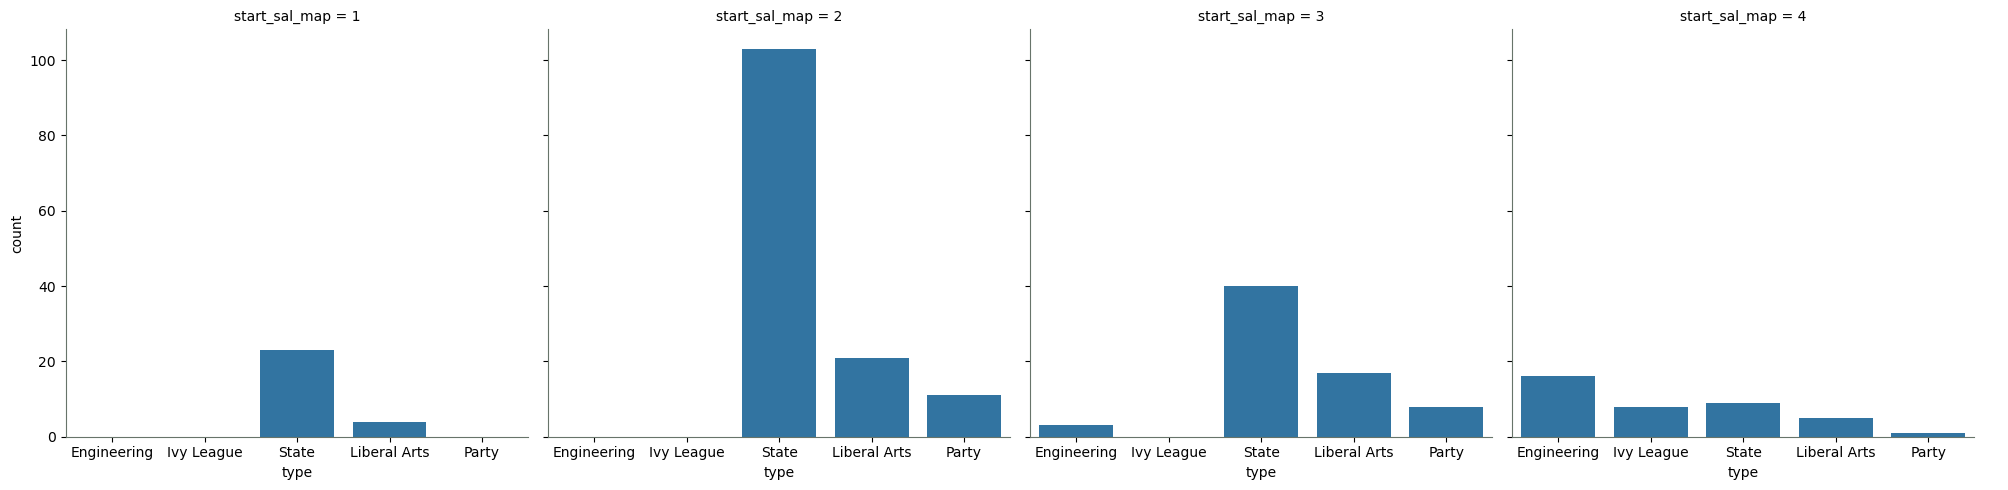

In [1056]:
## Plotting by Starting Salary Map
sns.catplot(x='type', col='start_sal_map', kind='count', data=df_type2)

# Most of the schools with high starting salary are Engineering and Ivy League schools

In [1057]:
## Returning to undergrad dataset
df_undergrad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      50 non-null     int64  
 1   major      50 non-null     object 
 2   start_sal  50 non-null     float64
 3   mid_sal    50 non-null     float64
 4   p_change   50 non-null     float64
 5   mid_10p    50 non-null     float64
 6   mid_25p    50 non-null     float64
 7   mid_75p    50 non-null     float64
 8   mid_90p    50 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.6+ KB


In [1058]:
## Creating answer dataset
df_undergrad_answer = df_undergrad['mid_sal']
df_undergrad_answer.head()

0    53.1
1    52.0
2    52.0
3    56.3
4    66.7
Name: mid_sal, dtype: float64

In [1059]:
## Preprocessing data
## Eliminating mid-salary (target column), major, probability change and index columns
df_undergrad = df_undergrad.drop(['mid_sal', 'major', 'p_change', 'index'], axis=1)
df_undergrad.head()

,start_sal,mid_10p,mid_25p,mid_75p,mid_90p
0,34.0,31.0,40.0,76.8,96.4
1,34.1,29.7,36.5,70.9,96.4
2,34.9,29.3,37.9,73.4,102.0
3,35.0,32.2,41.6,80.7,107.0
4,35.6,38.4,48.3,97.7,145.0


In [1060]:
## Splitting dataset between test and train
from sklearn.model_selection import train_test_split
undergrad_train, undergrad_test, answer_train, answer_test = train_test_split(
    df_undergrad, df_undergrad_answer, test_size = 0.3, random_state = 42)

In [1061]:
undergrad_train_copy = undergrad_train
undergrad_test_copy = undergrad_test
answer_train_copy = answer_train
answer_test_copy = answer_test
df_undergrad_copy = df_undergrad
df_undergrad_answer_copy = df_undergrad_answer

In [1062]:
## 70% train = 35 courses
undergrad_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 6 to 38
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   start_sal  35 non-null     float64
 1   mid_10p    35 non-null     float64
 2   mid_25p    35 non-null     float64
 3   mid_75p    35 non-null     float64
 4   mid_90p    35 non-null     float64
dtypes: float64(5)
memory usage: 1.6 KB


In [1063]:
## 30% test = 15 courses
undergrad_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 13 to 3
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   start_sal  15 non-null     float64
 1   mid_10p    15 non-null     float64
 2   mid_25p    15 non-null     float64
 3   mid_75p    15 non-null     float64
 4   mid_90p    15 non-null     float64
dtypes: float64(5)
memory usage: 720.0 bytes


In [1064]:
## Answer dataset became series
answer_train.head()

6      64.9
41     67.0
46    103.0
47    105.0
15     64.7
Name: mid_sal, dtype: float64

In [1065]:
## Linear regression on train dataset
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(undergrad_train, answer_train)

LinearRegression()

In [1066]:
## Predict test dataset with linear regression
answer_predict = regr.predict(undergrad_test)
answer_predict

array([ 59.25568363,  88.51061019,  72.17983159,  94.45137468,
        66.16397507, 109.92323564,  66.76935429,  78.71982121,
        90.07357098,  61.4909967 ,  63.65065383,  67.3173047 ,
       100.35038719,  60.39364271,  57.23092241])

In [1067]:
## Converting to array
## Fixes bug when plotting
answer_test = answer_test.array
answer_test

<NumpyExtensionArray>
[ 57.5,  88.9,  72.1,  93.6,  64.8, 107.0,  65.5,  80.9,  92.4,  62.6,  61.5,
  66.7,  98.6,  60.4,  56.3]
Length: 15, dtype: float64

In [1068]:
## Converting to series and sorting values
answer_test = pd.Series(answer_test)
answer_predict = pd.Series(answer_predict)

answer_test = answer_test.sort_values(ascending=True)
answer_predict = answer_predict.sort_values(ascending=True)

In [1069]:
## Calculating absolute mean error
mean_error = []
for item in range(len(answer_test)):
    mean_error.append(abs(answer_test[item] - answer_predict[item]))

In [1070]:
## Absolute mean error
mean_error

[1.7556836257434654,
 0.38938980936249834,
 0.0798315926930826,
 0.8513746783571605,
 1.3639750747768318,
 2.9232356399775767,
 1.269354285008447,
 2.180178792186865,
 2.3264290163001107,
 1.1090032951977093,
 2.150653833180826,
 0.6173046992604299,
 1.7503871948322995,
 0.006357287339703532,
 0.930922406982333]

In [1071]:
## Total mean error
total_mean_error = 0.0
for error in mean_error:
    total_mean_error += error
total_mean_error

19.70408123119934

In [1072]:
## Percentile mean error
perc_mean_error = []
for item in range(len(mean_error)):
    perc_mean_error.append(mean_error[item] * 100/ answer_test[item])
perc_mean_error

[3.0533628273799396,
 0.43800878443475627,
 0.1107234295327082,
 0.909588331578163,
 2.10489980675437,
 2.7319959252126886,
 1.9379454732953387,
 2.694905799983764,
 2.517780320671115,
 1.771570759101772,
 3.49699810273305,
 0.9254943017397749,
 1.775240562710243,
 0.010525310165072074,
 1.6535033871799876]

In [1073]:
## Total percentile mean error
total_perc_mean_error = 0.0
for error in perc_mean_error:
    total_perc_mean_error += error
total_perc_mean_error

26.13254312247274

In [1074]:
## Linear regression coefficient and intercept
print(regr.coef_)
print()
print(regr.intercept_)

[ 0.1297245  -0.2493838   0.84884386  0.28696882  0.0260264 ]

-0.5343905131979767


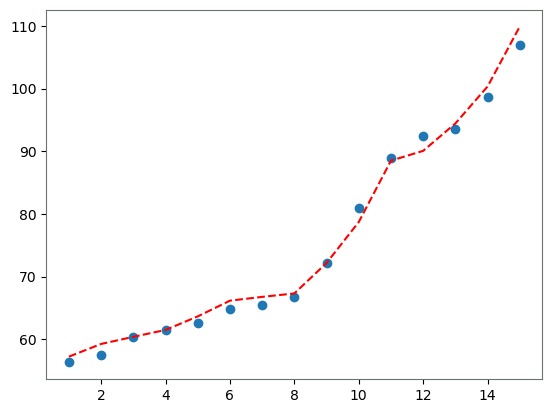

In [1075]:
## Plotting test dataset with linear regression model
## Blue dots are expected values
## Red line is model
x_plot = np.arange(1.0, 16.0, 1.0)
outcome = np.dot(undergrad_test, regr.coef_) + regr.intercept_
outcome = pd.Series(outcome).sort_values(ascending = True)
plt.scatter(x_plot, answer_test)
plt.plot(x_plot, outcome, 'r--')
plt.show()

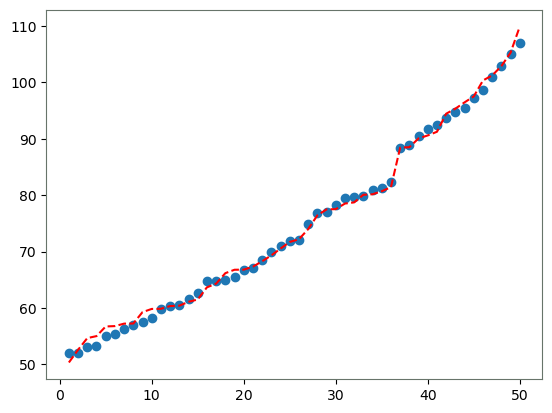

In [1076]:
## Plotting with entire dataset (train + test)
x2_plot = np.arange(1.0, 51.0, 1.0)
outcome_total = np.dot(df_undergrad, regr.coef_) + regr.intercept_
outcome_total = pd.Series(outcome_total).sort_values(ascending = True)
plt.scatter(x2_plot, df_undergrad_answer.sort_values(ascending = True))
plt.plot(x2_plot, outcome_total, 'r--')
plt.show()

In [1077]:
## Creating array 1s to calculate accuracy score

all_1s_test =[]
for item in range(len(perc_mean_error)):
    all_1s_test.append(1)

all_1s_test

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [1078]:
## Creating categorical values using percentile mean error
## Returns 1 if error <= 2%
## Returns 0 if error > 2%

categorical_perc_mean_error_test = []
for item in range(len(perc_mean_error)):
    if perc_mean_error[item] > 2:
        categorical_perc_mean_error_test.append(0)
    else:
        categorical_perc_mean_error_test.append(1)

categorical_perc_mean_error_test

[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1]

In [1079]:
## Calculating accuracy score of test dataset

from sklearn.metrics import accuracy_score
acc_score_test = accuracy_score(all_1s_test, categorical_perc_mean_error_test)

acc_score_test

0.6

In [1080]:
## Creating array of 0s and 1s of entire dataset (train + test)
## 50 total values
## First and last 10 values are 0
## Mid 30 values are 1

a01_total = []
for item in range(len(outcome_total)):
    if item < 10:
        a01_total.append(0)
    elif item < 40:
        a01_total.append(1)
    else:
        a01_total.append(0)

a01_total.count(0)


20

In [1081]:
## Categorical values of entire dataset with 2% error
## Using different values for extreme cases (first and last 10 values)
## Mid 30 values are normal
## Will use to create confusion matrix later

df_undergrad_answer = df_undergrad_answer.sort_values(ascending=True)
outcome_total = outcome_total.sort_values(ascending=True)

categorical_perc_mean_error_total = []
for item in range(len(outcome_total)):

    ## Percentile error of entire dataset
    perc_error = ((abs(df_undergrad_answer[item] - outcome_total[item]) * 100) / df_undergrad_answer[item])

    ## Big error
    if (perc_error > 2):
        ## Mid values are normal
        if item >= 10 and item < 40:
            categorical_perc_mean_error_total.append(0)
        ## Extreme values are flipped
        else:
            categorical_perc_mean_error_total.append(1)

    ## Small error
    else:
        ## Mid values are normal
        if item >= 10 and item < 40:
            categorical_perc_mean_error_total.append(1)
        ## Extreme values are flipped
        else:
            categorical_perc_mean_error_total.append(0)

categorical_perc_mean_error_total = np.array(categorical_perc_mean_error_total)
categorical_perc_mean_error_total

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

In [1082]:
## Accuracy score of entire dataset (train + test)

acc_score_total = accuracy_score(a01_total, categorical_perc_mean_error_total)

acc_score_total

0.72

tn = 15, fp = 5, fn = 9, tp = 21


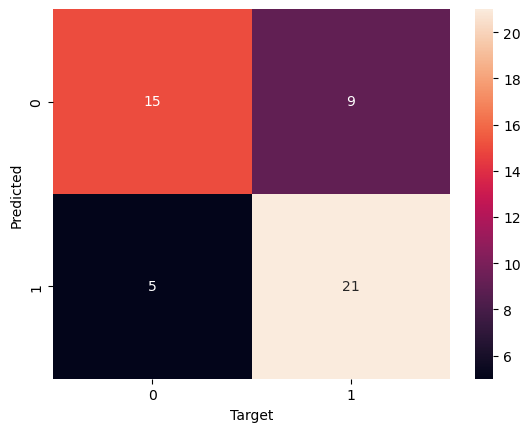

In [1083]:
## Creating confusion matrix
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(a01_total, categorical_perc_mean_error_total)

## Ravel converts 2x2 matrix to tuple
tn, fp, fn, tp = matriz.ravel()
print("tn = %i, fp = %i, fn = %i, tp = %i" % (tn, fp, fn, tp))

## Transpose of matrix to create heatmap correctly
sns.heatmap(matriz.T, annot = True)
plt.xlabel("Target")
plt.ylabel("Predicted")
plt.show()

In [1084]:
## Analysing confusion matrix results

## Accuracy of extreme values (first and last 10) > accuracy of mid 30 values

print(f"Accuracy of extreme values: {tn / (tn + fp)}")
print(f"Accuracy of mid values: {tp / (fn + tp)}")

Accuracy of extreme values: 0.75
Accuracy of mid values: 0.7


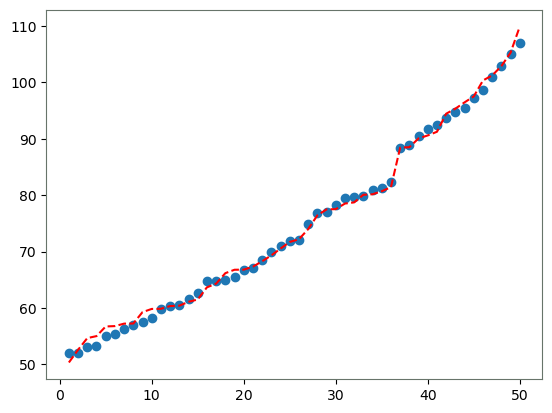

In [1085]:
x2_plot = np.arange(1.0, 51.0, 1.0)
plt.scatter(x2_plot, df_undergrad_answer.sort_values(ascending = True))
plt.plot(x2_plot, outcome_total, 'r--')
plt.show()

In [1086]:
undergrad_train.head()

,start_sal,mid_10p,mid_25p,mid_75p,mid_90p
6,35.8,28.8,42.2,87.4,125.0
41,54.2,47.6,56.4,80.9,98.3
46,60.9,69.3,83.8,130.0,168.0
47,61.4,66.1,84.1,135.0,162.0
15,38.0,33.4,44.8,93.2,133.0


In [1087]:
answer_train.head()

6      64.9
41     67.0
46    103.0
47    105.0
15     64.7
Name: mid_sal, dtype: float64

In [1088]:
df_undergrad_answer.head()

1     52.0
2     52.0
0     53.1
10    53.2
9     55.0
Name: mid_sal, dtype: float64

In [1089]:
answer_predict.head()

14    57.230922
0     59.255684
13    60.393643
9     61.490997
10    63.650654
dtype: float64

In [1090]:
# Linear regression performance
mean_error = []
for item in range(len(answer_predict)):
    mean_error.append(abs(df_undergrad_answer[item] - answer_predict[item]))
mean_error

[6.155683625743464,
 36.51061019063751,
 20.179831592693077,
 38.15137467835716,
 0.5360249252231739,
 50.12323563997758,
 1.8693542850084413,
 21.819821207813142,
 29.673570983699896,
 6.490996704802292,
 10.450653833180823,
 9.11730469926043,
 38.850387194832294,
 2.893642712660295,
 11.26907759301767]

In [1091]:
# Total dataset
df_undergrad_answer.count()

50

In [1092]:
# Test dataset
answer_predict.count()

15

In [1093]:
# Multilayer perceptron used to retrain dataset
# Linear regression's performance was too poor
from sklearn.model_selection import train_test_split
undergrad_train = undergrad_train_copy.sort_index(ascending = True)

answer_train = answer_train_copy.sort_index(ascending = True)

undergrad_test = undergrad_test_copy.sort_index(ascending = True)

answer_test = answer_test_copy.sort_index(ascending = True)

df_undergrad = df_undergrad_copy.sort_index(ascending = True)     

df_undergrad_answer = df_undergrad_answer.sort_index(ascending = True)  

# MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, max_iter=10000))

# Changed values to int to fix bug
# Don't know why it solves the problem
mlp_model.fit(X=undergrad_train.astype(int), y=answer_train.astype(int))
answer_predict = mlp_model.predict(undergrad_test.astype(int))
answer_predict = list(answer_predict)
answer_predict

[53, 70, 64, 70, 58, 70, 60, 78, 59, 71, 88, 88, 103, 103, 103]

In [1094]:
# Creates list of answer_test
answer_test_converted = []
for item in answer_test:
    answer_test_converted.append(item)
answer_test = answer_test_converted

In [1095]:
answer_test

[56.3,
 66.7,
 60.4,
 61.5,
 57.5,
 64.8,
 62.6,
 80.9,
 65.5,
 72.1,
 92.4,
 98.6,
 88.9,
 93.6,
 107.0]

In [1096]:
# Difference between predicted and real values
model_diff = []
counter = 0
while counter != len(answer_test):
    model_diff.append(answer_predict[counter] - answer_test[counter])
    counter += 1
model_diff

[-3.299999999999997,
 3.299999999999997,
 3.6000000000000014,
 8.5,
 0.5,
 5.200000000000003,
 -2.6000000000000014,
 -2.9000000000000057,
 -6.5,
 -1.0999999999999943,
 -4.400000000000006,
 -10.599999999999994,
 14.099999999999994,
 9.400000000000006,
 -4.0]

In [1097]:
# Percentile difference
model_diff_perc = []
counter = 0
while counter != len(answer_test):
    model_diff_perc.append(model_diff[counter] * 100 / answer_test[counter])
    counter += 1
model_diff_perc

[-5.861456483126106,
 4.947526236881555,
 5.960264900662254,
 13.821138211382113,
 0.8695652173913043,
 8.024691358024695,
 -4.153354632587861,
 -3.584672435105075,
 -9.923664122137405,
 -1.5256588072121975,
 -4.761904761904768,
 -10.750507099391477,
 15.86051743532058,
 10.04273504273505,
 -3.7383177570093458]

In [1098]:
# Categorizing values in answer
print(f"Answer test values: {answer_test}")

counter = 0 
while counter < len(answer_test):
    if answer_test[counter] < 60:
        answer_test[counter] = 0
    
    elif answer_test[counter] < 70:
        answer_test[counter] = 1
    
    elif answer_test[counter] < 80:
        answer_test[counter] = 2
    
    elif answer_test[counter] < 90:
        answer_test[counter] = 3
    
    elif answer_test[counter] < 100:
        answer_test[counter] = 4
    
    elif answer_test[counter] < 110:
        answer_test[counter] = 5
    
    counter += 1


print(f"Categorized answer test values: {answer_test}")

Answer test values: [56.3, 66.7, 60.4, 61.5, 57.5, 64.8, 62.6, 80.9, 65.5, 72.1, 92.4, 98.6, 88.9, 93.6, 107.0]
Categorized answer test values: [0, 1, 1, 1, 0, 1, 1, 3, 1, 2, 4, 4, 3, 4, 5]


In [1099]:
# Categorizing values in predict
print(f"Answer predict values: {answer_predict}")

counter = 0
while counter < len(answer_predict):
    # If the percentage difference is small, use the corresponding value from answer_test
    if abs(model_diff_perc[counter]) < 5:
        answer_predict[counter] = answer_test[counter]
    
    elif answer_predict[counter] < 60:
        answer_predict[counter] = 0
    
    elif answer_predict[counter] < 70:
        answer_predict[counter] = 1
    
    elif answer_predict[counter] < 80:
        answer_predict[counter] = 2
    
    elif answer_predict[counter] < 90:
        answer_predict[counter] = 3
    
    elif answer_predict[counter] < 100:
        answer_predict[counter] = 4
    
    elif answer_predict[counter] < 110:
        answer_predict[counter] = 5
    
    counter += 1

print(f"Categorized answer predict values: {answer_predict}")


Answer predict values: [53, 70, 64, 70, 58, 70, 60, 78, 59, 71, 88, 88, 103, 103, 103]
Categorized answer predict values: [0, 1, 1, 2, 0, 2, 1, 3, 0, 2, 4, 3, 5, 5, 5]


<Axes: >

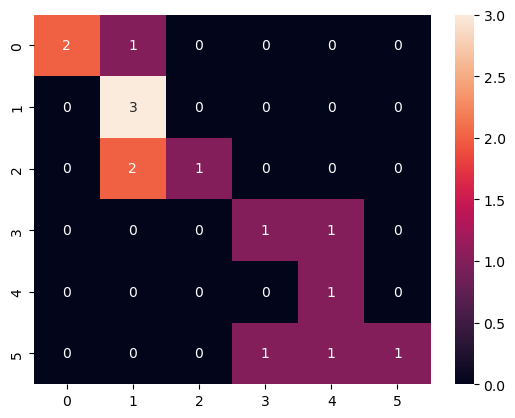

In [1100]:
# Confusion matrix of predicted values and real values
# Heatmap
matriz_categ = confusion_matrix(answer_test, answer_predict)
sns.heatmap(matriz_categ.T, annot = True)

In [1101]:
# Confusion Matrix
matriz_categ

array([[2, 0, 0, 0, 0, 0],
       [1, 3, 2, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1]], dtype=int64)

In [1102]:
# Accuracy of MLP Classifier
accuracy_score(answer_test, answer_predict)

0.6

In [1103]:
# Recall Macro
# Numerator is value in diagonal
# Denominator is sum of values in line
# Recall of each line is numerator / denominator
# Recall macro is recall of each line / number of lines
count = 0
recall_macro = []
while count != 6:
    num_diag = matriz_categ[count][count]
    sum_line = sum(matriz_categ[count])
    recall_macro.append(num_diag / (sum_line))
    count += 1
recall_macro = sum(recall_macro) / 6
recall_macro

0.7222222222222223

In [1104]:
# Precision Macro
# Numerator is value in diagonal
# Denominator is sum of values in column
# Precision of each line is numerator / denominator
# Precision macro is recall of each line / number of lines
count = 0
precision_macro = []
while count != 6:
    num_diag = matriz_categ[count][count]
    col_count = 0
    sum_column = 0
    while col_count != 6:
        sum_column += matriz_categ[col_count][count]
        col_count += 1
    precision_macro.append(num_diag / (sum_column))
    count += 1
precision_macro = sum(precision_macro) / 6
precision_macro

0.638888888888889